In [12]:
import pandas as pd

data = pd.read_csv(r"D:\DATASETS\UCR\001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_52620.txt",header=None,index_col=None)

In [13]:
print(data)

                0
0     -142.928840
1     -164.932650
2     -178.507420
3     -181.063060
4     -172.906480
...           ...
79790   17.201994
79791   24.004032
79792   27.221281
79793   34.907786
79794   21.102266

[79795 rows x 1 columns]


In [14]:
import os
data_path = "D:/DATASETS/UCR"
all_files = os.listdir(data_path)

print(all_files)

['001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_52620.txt', '002_UCR_Anomaly_DISTORTED2sddb40_35000_56600_56900.txt', '003_UCR_Anomaly_DISTORTED3sddb40_35000_46600_46900.txt', '004_UCR_Anomaly_DISTORTEDBIDMC1_2500_5400_5600.txt', '005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature1_4000_5391_5392.txt', '006_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature2_4000_5703_5727.txt', '007_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature3_4000_6520_6544.txt', '008_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature4_4000_5549_5597.txt', '009_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature5_4000_4852_4900.txt', '010_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature6_4000_6006_6054.txt', '011_UCR_Anomaly_DISTORTEDECG1_10000_11800_12100.txt', '012_UCR_Anomaly_DISTORTEDECG2_15000_16000_16100.txt', '013_UCR_Anomaly_DISTORTEDECG3_15000_16000_16100.txt', '014_UCR_Anomaly_DISTORTEDECG3_8000_17000_17100.txt', '015_UCR_Anomaly_DISTORTEDECG4_5000_16800_17100.txt', '016_UCR_Anomaly_DISTORTEDECG4_5000_16900_17100.txt', '017_UCR_Anomaly_DISTORT

In [20]:
all_files[0][:-4].split('_')[-3:]

['35000', '52000', '52620']

In [21]:
int('35000')

35000

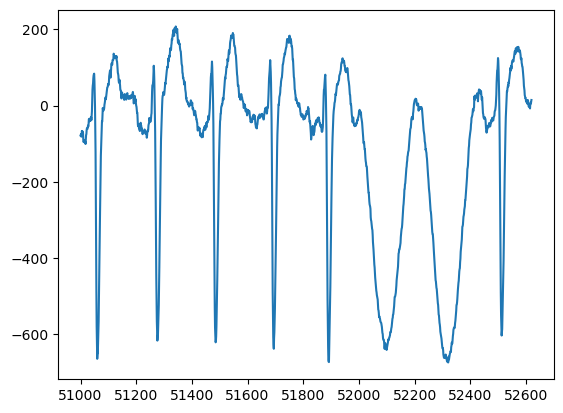

In [23]:
import matplotlib.pyplot as plt

plt.plot(data[51000:52620])


In [27]:
import numpy as np

l = np.zeros((1000,1))
l[0:10] = 1
l

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],